# 정확도 Accuracy 

In [26]:
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):
    def fit(self, X,y=None): # fit() 메서드는 아무것도 학습하지 않음음
        pass

    def predict(self, X): # sex ==1, survived=0으로 예측, 아니면 1로 예측
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]): 
            if X['Sex'].iloc[i] == 1:
                pred[i]=0
            else:
                pred[i]=1
        return pred


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 타이타닉 데이터 불러오기
titanic_df = pd.read_csv('./titanic_train.csv')
X_titanic_df = titanic_df.drop('Survived', axis=1)
y_titanic_df = titanic_df['Survived'] #label

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 전처리
X_titanic_df = transform_features(X_titanic_df)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 모델 생성 & 학습
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

# 모델 예측
my_pred = myclf.predict(X_test)
print('Dummy Classifier의 정확도:', accuracy_score(y_test, my_pred)) #0.7877094972067039

Dummy Classifier의 정확도: 0.7877094972067039


C:\Users\selina\AppData\Local\Temp\ipykernel_10060\2293304976.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\selina\AppData\Local\Temp\ipykernel_10060\2293304976.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

## MNIST

In [28]:
from sklearn.datasets import load_digits

class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros((len(X),1),dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digit()를 이용해 MNIST 데이터 로딩
digits = load_digits()

#digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기:', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier 로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
accuracy = accuracy_score(y_test, fakepred)
print('모든 예측을 0으로 하여도 정확도는', accuracy)

레이블 테스트 세트 크기: (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는 0.9


# 오차행렬 Confusion_matrix

In [29]:
from sklearn.metrics import confusion_matrix 

#row: 실제값, col: 예측
confusion_matrix(y_test, fakepred) 

array([[405,   0],
       [ 45,   0]])

# 정밀도와 재현율

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [31]:
# 호출 함수
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred) 
    recall = recall_score(y_test, pred)

    print('오차 행렬:\n', confusion)
    print('*'*20)
    print(f'정확도: {accuracy}, 정밀도: {precision}, 재현율: {recall}')

In [32]:
# 타이타닉 데이터 불러오기
titanic_df = pd.read_csv('./titanic_train.csv')
X_titanic_df = titanic_df.drop('Survived', axis=1)
y_titanic_df = titanic_df['Survived'] #label
X_titanic_df = transform_features(X_titanic_df)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

# 모델 생성 및 학습
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)


오차 행렬:
 [[104  14]
 [ 13  48]]
********************
정확도: 0.8491620111731844, 정밀도: 0.7741935483870968, 재현율: 0.7868852459016393


C:\Users\selina\AppData\Local\Temp\ipykernel_10060\2293304976.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
C:\Users\selina\AppData\Local\Temp\ipykernel_10060\2293304976.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

## 정밀도/재현율 트레이드오프

## predict_proba()

In [33]:
# predict_proba()
pred_proba = lr_clf.predict_proba(X_test)
print('pred_proba( )결과 shape :', pred_proba.shape)
print('pred_proba 앞 3개 추출:\n', pred_proba[:3])

# 예측 확률과 예측 결괏값을 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)],axis=1)
print('두 개의 class중에서 더 큰 확률을 클래스 값으로 예측:\n', pred_proba_result[:3])



pred_proba( )결과 shape : (179, 2)
pred_proba 앞 3개 추출:
 [[0.46235897 0.53764103]
 [0.87877764 0.12122236]
 [0.87720996 0.12279004]]
두 개의 class중에서 더 큰 확률을 클래스 값으로 예측:
 [[0.46235897 0.53764103 1.        ]
 [0.87877764 0.12122236 0.        ]
 [0.87720996 0.12279004 0.        ]]


## 이진화 Binarizer

In [34]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값
custom_threshold = 0.4 # 이 기준보다 큰 수치를 생존 아니면 사망
#predict_proba( ) 반환값의 두 번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출해 Binarizer 적용
pred_binarizer = pred_proba[:,1].reshape(-1,1) 

binarizer = Binarizer(threshold = custom_threshold).fit(pred_binarizer) #새로운 예측값으로 이진화한 예측값값
custom_predict = binarizer.transform(pred_binarizer)

get_clf_eval(y_test, custom_predict)

오차 행렬:
 [[98 20]
 [10 51]]
********************
정확도: 0.8324022346368715, 정밀도: 0.7183098591549296, 재현율: 0.8360655737704918


## 정밀도와 재현율의 시각화 - precision_recall_curve()


반환된 분류 결정 임곗값 배열의 Shape: (165,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값: [0.01 0.09 0.11 0.13 0.15 0.23 0.35 0.5  0.63 0.75 0.89]
샘플 임계값별 정밀도: [0.341 0.372 0.415 0.448 0.505 0.585 0.688 0.774 0.913 0.935 0.938]
샘플 임계값별 재현율: [1.    1.    0.967 0.918 0.902 0.902 0.869 0.787 0.689 0.475 0.246]


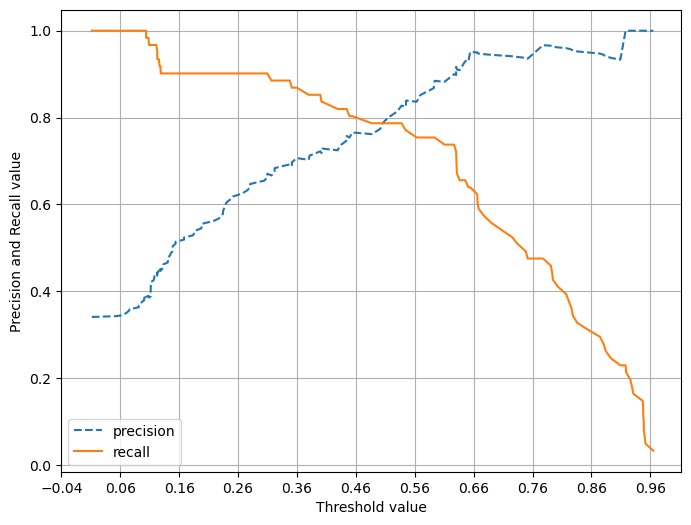

In [35]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 로우가 165건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출
thr_index = np.arange(0, thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:', np.round(thresholds[thr_index],2))

#15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))

#시각화
def precision_recall_curve_plot(y_test, pred_proba_c1):
    # thredshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출 
    precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    #X축을 thredshold 값으로, Y축은 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시 
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precision[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label ='recall')
    
    #thredshold 값 X축 Scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    #X축, y축, label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend();plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

# f1-score

재현율과 정밀도의 조화 평균: 그 모델의 전체적인 성능을 볼 때

In [36]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('F1 스코어:', f1)

F1 스코어: 0.7804878048780488


# ROC (Receiver Operation Characteristics)

민감도 어떻게 달라지는지 보는 지표 (=재현율, 실제 양성을 맞춘 비율)
거짓긍정율 = 1-특이도

In [37]:
from sklearn.metrics import roc_curve

#레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
#반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 step으로 추출
#thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작 
thr_index = np.arange(1, thresholds.shape[0],5)

print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값:', np.round(thresholds[thr_index],2))

# 5step 단위로 추출된 임계값에 따른 TPR, FPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR:', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플 index로 추출한 임곗값: [0.97 0.65 0.63 0.56 0.45 0.4  0.35 0.15 0.13 0.11 0.11]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.169 0.203 0.466 0.585 0.686 0.797]
샘플 임곗값별 TPR: [0.033 0.639 0.721 0.754 0.803 0.836 0.885 0.902 0.934 0.967 0.984]


<function matplotlib.pyplot.show(close=None, block=None)>

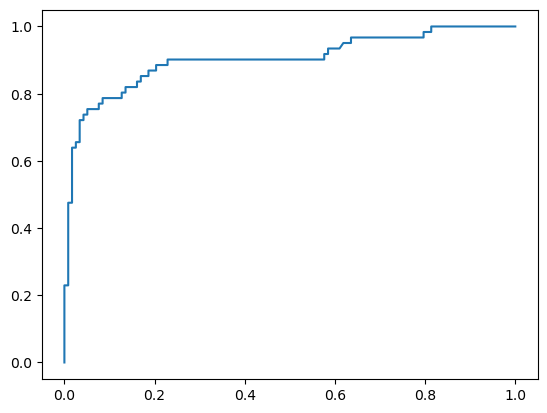

In [38]:
# 시각화
import matplotlib.pyplot as plt

plt.plot(fprs, tprs, label = 'ROC')
plt.show

# ROC - AUC 

In [39]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값:', roc_score)

ROC AUC 값: 0.9025423728813561


모델 1의 ROC-AUC = 0.92 - 모델의 편별 성능이 우수하다 <br>
모델 2의 ROC-AUC = 0.78 - 모델 1보다 성능이 낮다